# Modelling

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Refdinal/insight-hustler/refs/heads/master/data/processed/data_preprocessed.csv")

In [ ]:
df

,city_development_index,relevent_experience,education_level,experience,last_new_job,training_hours,gender_Female,gender_Male,gender_Other,enrolled_university_Full time course,...,company_size_Unknown,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Unknown,training_per_experience,target
0,0.920,1,3,21,1,3.610918,False,True,False,False,...,True,False,False,False,False,False,False,True,1.636364,1.0
1,0.776,0,3,15,5,3.871201,False,True,False,False,...,False,False,False,False,False,False,True,False,2.937500,0.0
2,0.624,0,3,5,0,4.430817,False,False,True,True,...,True,False,False,False,False,False,False,True,13.833333,0.0
3,0.767,1,4,21,4,2.197225,False,True,False,False,...,False,False,True,False,False,False,False,False,0.363636,0.0
4,0.764,1,3,11,1,3.218876,False,False,True,False,...,True,False,False,False,False,False,False,True,2.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18000,0.878,0,3,14,1,3.761200,False,True,False,False,...,True,False,False,False,False,False,False,True,2.800000,1.0
18001,0.920,1,3,14,4,3.970292,False,True,False,False,...,True,False,False,False,False,False,False,True,3.466667,1.0
18002,0.920,1,3,21,4,3.806662,False,True,False,False,...,False,False,False,False,False,False,True,False,2.000000,0.0
18003,0.802,1,2,0,2,4.584967,False,True,False,False,...,False,False,False,False,False,False,True,False,97.000000,0.0


## Split Data Train-test

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

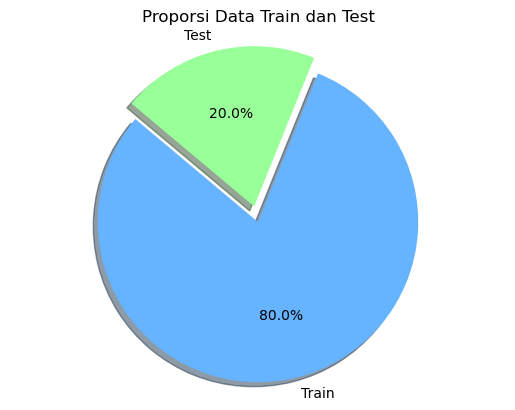

In [ ]:
# Membuat pie chart untuk proporsi data train dan test
labels = ['Train', 'Test']
sizes = [len(X_train), len(X_test)]
colors = ['#66b3ff', '#99ff99']
explode = (0.1, 0)  # meledakkan sedikit bagian 'Train' untuk efek visual

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Membuat chart dalam bentuk lingkaran
plt.title('Proporsi Data Train dan Test')
plt.show()

## SMOTE for imbalance data to training data

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

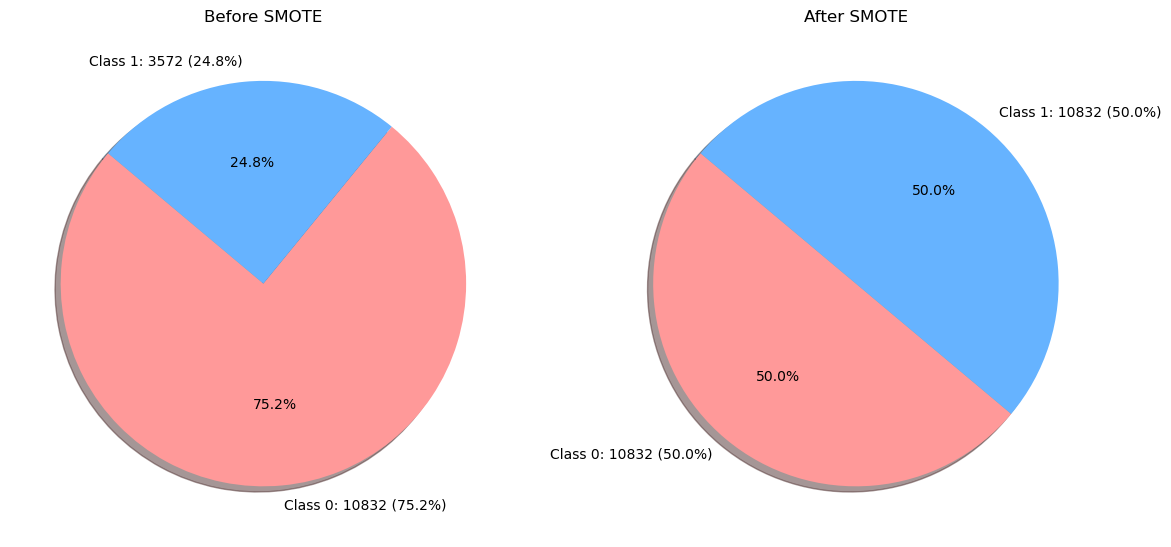

In [ ]:
# Menghitung jumlah data sebelum dan sesudah SMOTE
sizes_before = [y_train.value_counts().get(0, 0), y_train.value_counts().get(1, 0)]
sizes_after = [y_train_resampled.value_counts().get(0, 0), y_train_resampled.value_counts().get(1, 0)]

# Plot untuk sebelum SMOTE
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Menampilkan pie chart sebelum SMOTE
plt.pie(sizes_before, labels=[f'Class 0: {sizes_before[0]} ({sizes_before[0] / sum(sizes_before) * 100:.1f}%)',
                              f'Class 1: {sizes_before[1]} ({sizes_before[1] / sum(sizes_before) * 100:.1f}%)'],
        autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], startangle=140, shadow=True)
plt.title('Before SMOTE')

# Plot untuk sesudah SMOTE
plt.subplot(1, 2, 2)  # Menampilkan pie chart setelah SMOTE
plt.pie(sizes_after, labels=[f'Class 0: {sizes_after[0]} ({sizes_after[0] / sum(sizes_after) * 100:.1f}%)',
                             f'Class 1: {sizes_after[1]} ({sizes_after[1] / sum(sizes_after) * 100:.1f}%)'],
        autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], startangle=140, shadow=True)
plt.title('After SMOTE')

plt.tight_layout()
plt.show()

## Scaling data dengan standar scaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)  # Fit dan transform data latih
X_test_scaled = scaler.transform(X_test)  # Hanya transform data uji

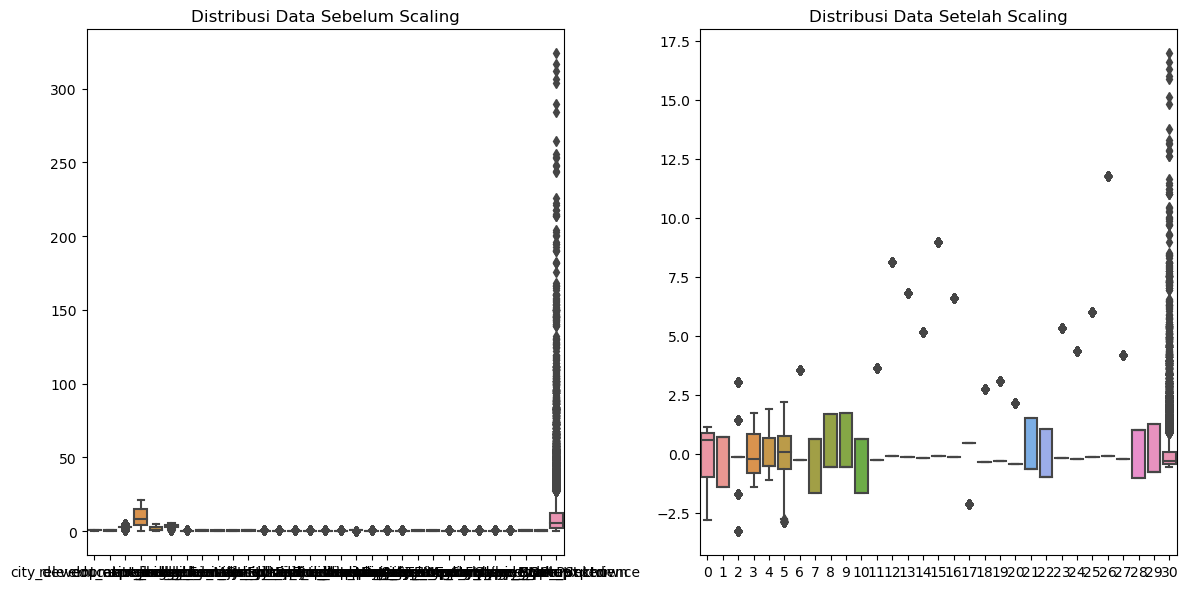

In [ ]:
# Menampilkan grafik distribusi fitur sebelum dan sesudah scaling
plt.figure(figsize=(12, 6))

# Plot distribusi data sebelum scaling (X_train_resampled)
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train_resampled)
plt.title('Distribusi Data Sebelum Scaling')

# Plot distribusi data setelah scaling (X_train_scaled)
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('Distribusi Data Setelah Scaling')

plt.tight_layout()
plt.show()

# 1. Modelling

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)

def evaluate_metrics(model, X_train, y_train, X_test, y_test):
    """
    Evaluates a classification model and returns a DataFrame with key metrics for both train and test datasets.

    Parameters:
    - model: Trained classification model (e.g., LogisticRegression, RandomForestClassifier, etc.)
    - X_train: Training features
    - y_train: Training labels
    - X_test: Test features
    - y_test: Test labels

    Returns:
    - metrics_df: A DataFrame containing evaluation metrics for both train and test sets.
    """
    # Predictions and probabilities
    y_pred_train = model.predict(X_train)
    y_proba_train = model.predict_proba(X_train)[:, 1]

    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1]

    # Metrics for Train Set
    train_metrics = {
        "Accuracy": accuracy_score(y_train, y_pred_train),
        "Precision": precision_score(y_train, y_pred_train),
        "Recall": recall_score(y_train, y_pred_train),
        "F1-Score": f1_score(y_train, y_pred_train),
        "ROC-AUC": roc_auc_score(y_train, y_proba_train),
    }

    # Metrics for Test Set
    test_metrics = {
        "Accuracy": accuracy_score(y_test, y_pred_test),
        "Precision": precision_score(y_test, y_pred_test),
        "Recall": recall_score(y_test, y_pred_test),
        "F1-Score": f1_score(y_test, y_pred_test),
        "ROC-AUC": roc_auc_score(y_test, y_proba_test),
    }

    # Combine metrics into a DataFrame
    metrics_df = pd.DataFrame([train_metrics, test_metrics], index=["Train", "Test"])

    return metrics_df.T

## Model 1 : Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train_resampled)

LogisticRegression()

In [ ]:
logreg_result = evaluate_metrics(logreg, X_train_scaled, y_train_resampled, X_test_scaled, y_test)
logreg_result

,Train,Test
Accuracy,0.805253,0.773396
Precision,0.837639,0.518972
Recall,0.757293,0.500590
F1-Score,0.795442,0.509615
ROC-AUC,0.892640,0.769411


## Model 2 : K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train_resampled)

KNeighborsClassifier()

In [ ]:
knn_result = evaluate_metrics(knn, X_train_scaled, y_train_resampled, X_test_scaled, y_test)
knn_result

,Train,Test
Accuracy,0.871861,0.747292
Precision,0.871861,0.466596
Recall,0.871861,0.519481
F1-Score,0.871861,0.491620
ROC-AUC,0.950554,0.722752


## Model 3 : Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_scaled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [ ]:
dtree_result = evaluate_metrics(dtree, X_train_scaled, y_train_resampled, X_test_scaled, y_test)
dtree_result

,Train,Test
Accuracy,0.998984,0.698139
Precision,0.999908,0.386792
Recall,0.998061,0.484061
F1-Score,0.998984,0.429995
ROC-AUC,0.999998,0.624642


## Model 4 : Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
rf_model_result = evaluate_metrics(rf_model, X_train_scaled, y_train_resampled, X_test_scaled, y_test)
rf_model_result

,Train,Test
Accuracy,0.998984,0.759789
Precision,0.998708,0.489842
Recall,0.999261,0.512397
F1-Score,0.998985,0.500866
ROC-AUC,0.999990,0.763286


## Model 5 : XGboost

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_model_result = evaluate_metrics(xgb_model, X_train_scaled, y_train_resampled, X_test_scaled, y_test)
xgb_model_result

,Train,Test
Accuracy,0.897110,0.788392
Precision,0.895468,0.544410
Recall,0.899188,0.615112
F1-Score,0.897324,0.577605
ROC-AUC,0.964546,0.788637


# Model Comparison

In [ ]:
comparison_df_test = pd.DataFrame()
comparison_df_train = pd.DataFrame()

In [ ]:
comparison_df_test['Logistic Regression'] = logreg_result['Test']
comparison_df_test['K-Nearest Neighbors'] = knn_result['Test']
comparison_df_test['Decision Tree'] = dtree_result['Test']
comparison_df_test['Random Forest Classifier'] = rf_model_result['Test']
comparison_df_test['XGBoost'] = xgb_model_result['Test']
comparison_df_train['Logistic Regression'] = logreg_result['Train']
comparison_df_train['K-Nearest Neighbors'] = knn_result['Train']
comparison_df_train['Decision Tree'] = dtree_result['Train']
comparison_df_train['Random Forest Classifier'] = rf_model_result['Train']
comparison_df_train['XGBoost'] = xgb_model_result['Train']

In [ ]:
comparison_df_test

,Logistic Regression,K-Nearest Neighbors,Decision Tree,Random Forest Classifier,XGBoost
Accuracy,0.773396,0.747292,0.698139,0.759789,0.788392
Precision,0.518972,0.466596,0.386792,0.489842,0.544410
Recall,0.500590,0.519481,0.484061,0.512397,0.615112
F1-Score,0.509615,0.491620,0.429995,0.500866,0.577605
ROC-AUC,0.769411,0.722752,0.624642,0.763286,0.788637


In [ ]:
comparison_df_train

,Logistic Regression,K-Nearest Neighbors,Decision Tree,Random Forest Classifier,XGBoost
Accuracy,0.805253,0.871861,0.998984,0.998984,0.897110
Precision,0.837639,0.871861,0.999908,0.998708,0.895468
Recall,0.757293,0.871861,0.998061,0.999261,0.899188
F1-Score,0.795442,0.871861,0.998984,0.998985,0.897324
ROC-AUC,0.892640,0.950554,0.999998,0.999990,0.964546


# Analisis Model dan Rekomendasi Hyperparameter Tuning

## Logistic Regression
- **Train vs. Test**:
  - Performanya cukup stabil (Accuracy: 0.8052 vs 0.7734).
  - Tidak menunjukkan peningkatan signifikan di train dibandingkan test, yang mengindikasikan model ini sudah cukup optimal dengan parameter default.
- **ROC-AUC**: Skor pada test (0.7694) tergolong baik, tetapi tertinggal dibanding model lain seperti XGBoost.

## K-Nearest Neighbors (KNN)
- **Train vs. Test**:
  - Menunjukkan overfitting, dengan performa jauh lebih baik di train (Accuracy: 0.8719 vs 0.7473).
  - Tuning, seperti memilih jumlah neighbors yang optimal, dapat meningkatkan performa pada data test.

## Decision Tree
- **Train vs. Test**:
  - Sangat overfit, dengan Accuracy di train hampir sempurna (0.9990) tetapi jauh lebih rendah di test (0.6981).
  - Model ini perlu tuning, terutama pada kedalaman pohon (`max_depth`) dan lainnya untuk mengurangi overfitting.

## Random Forest Classifier
- **Train vs. Test**:
  - Performanya baik dan cukup stabil (Accuracy: 0.9989 di train vs 0.7598 di test).
  - Ada indikasi overfitting. Hyperparameter tuning, seperti jumlah estimator (`n_estimators`) dan maksimal fitur (`max_features`), dapat membantu meningkatkan generalisasi.

## XGBoost
- **Train vs. Test**:
  - Memiliki performa paling baik di test (Accuracy: 0.7884) dan sangat tinggi di train (0.8971).
  - Ini menunjukkan potensi besar. Tuning hyperparameter seperti `learning_rate` dan `max_depth` dapat memaksimalkan hasilnya.

---

## Rekomendasi untuk Tuning
1. **XGBoost**:
   - Performanya terbaik pada test set, dan tuning dapat membantu memaksimalkan potensi model.
2. **Random Forest Classifier**:
   - Stabil dengan performa yang baik, tetapi sedikit overfit pada train. Tuning dapat membantu meningkatkan generalisasi.
3. **K-Nearest Neighbors (KNN)**:
   - Overfitting cukup signifikan. Tuning jumlah neighbors (`n_neighbors`) atau memilih metric jarak yang lebih sesuai dapat memperbaiki performa pada test.

---

## Catatan
- **Decision Tree** menunjukkan hasil buruk di test dan terlalu overfit, sehingga kurang prioritas untuk tuning.
- **Logistic Regression** stabil, tetapi metriknya tidak sebaik model lainnya. Prioritaskan model dengan performa test lebih unggul.


## 2. Tuning Hyperparameter

### KNN Model

In [ ]:
param_grid_knn = {
    "n_neighbors": range(1, 51, 2),
#     "leaf_size": range(10, 50, 10),
#     "p": [1, 2],
#     "metric": ['euclidean', 'manhattan']
}
knn_tuned = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Paralelisasi
    verbose=2,  # Menampilkan progress
    scoring='accuracy'  # Metrik evaluasi
)
knn_tuned.fit(X_train_scaled, y_train_resampled)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 51, 2)}, scoring='accuracy',
             verbose=2)

In [ ]:
knn_tuned_result = evaluate_metrics(knn_tuned.best_estimator_, X_train_scaled, y_train_resampled, X_test_scaled, y_test)
knn_tuned_result

,Train,Test
Accuracy,0.897526,0.727853
Precision,0.895409,0.429926
Recall,0.900203,0.481700
F1-Score,0.897799,0.454343
ROC-AUC,0.968078,0.695982


Best Parameters: {'n_neighbors': 3}
Best Cross-Validation Score: 0.8041


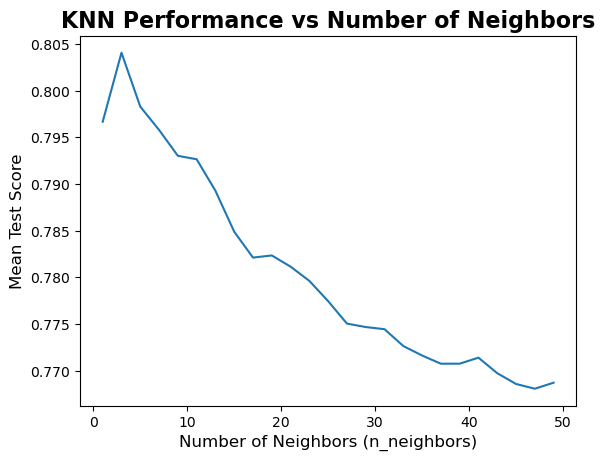

In [ ]:
# Output parameter terbaik dan skor terbaik
print(f"Best Parameters: {knn_tuned.best_params_}")
print(f"Best Cross-Validation Score: {knn_tuned.best_score_:.4f}")
# Data plotting
x = knn_tuned.cv_results_['param_n_neighbors']
y = knn_tuned.cv_results_['mean_test_score']
plt.plot(x, y)
plt.title('KNN Performance vs Number of Neighbors', fontsize=16, fontweight='bold')
plt.xlabel('Number of Neighbors (n_neighbors)', fontsize=12)
plt.ylabel('Mean Test Score', fontsize=12)
plt.show()

### Random Forest

In [ ]:
param_grid_rf = {
    "n_estimators": range(1,1000,50)           # Jumlah pohon
#     "max_depth": [None, 10, 20, 30],         # Kedalaman maksimum pohon
#     "min_samples_split": [2, 5, 10],         # Minimum sampel untuk split
#     "min_samples_leaf": [1, 2, 4],           # Minimum sampel di setiap daun
#     "bootstrap": [True, False],              # Penggunaan bootstrap sampel
}

# Inisialisasi GridSearchCV untuk Random Forest
rf_tuned = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Paralelisasi
    verbose=2,  # Menampilkan progress
    scoring='accuracy'  # Metrik evaluasi
)

# Melatih Random Forest dengan GridSearchCV
rf_tuned.fit(X_train_scaled, y_train_resampled)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'n_estimators': range(1, 1000, 50)},
             scoring='accuracy', verbose=2)

In [ ]:
rf_tuned_result = evaluate_metrics(rf_tuned.best_estimator_, X_train_scaled, y_train_resampled, X_test_scaled, y_test)
rf_tuned_result

,Train,Test
Accuracy,0.998984,0.766731
Precision,0.998432,0.503902
Recall,0.999538,0.533648
F1-Score,0.998985,0.518349
ROC-AUC,0.999992,0.768752


Best Parameters: {'n_estimators': 851}
Best Cross-Validation Score: 0.8412


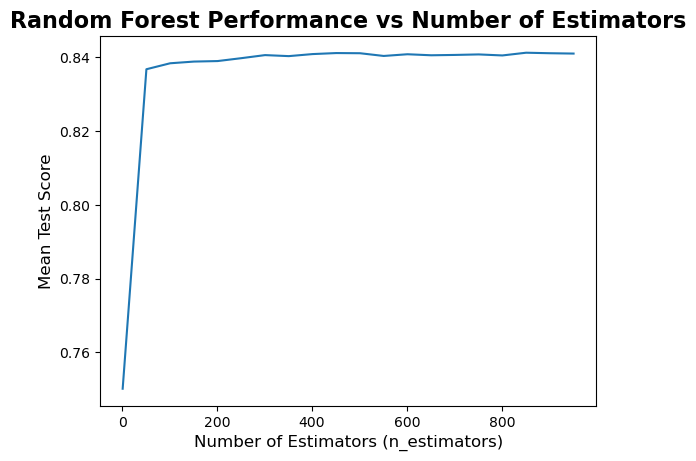

In [ ]:
# Output parameter terbaik dan skor terbaik
print(f"Best Parameters: {rf_tuned.best_params_}")
print(f"Best Cross-Validation Score: {rf_tuned.best_score_:.4f}")
# Data plotting
x = rf_tuned.cv_results_['param_n_estimators']
y = rf_tuned.cv_results_['mean_test_score']
plt.plot(x, y)
plt.title('Random Forest Performance vs Number of Estimators', fontsize=16, fontweight='bold')
plt.xlabel('Number of Estimators (n_estimators)', fontsize=12)
plt.ylabel('Mean Test Score', fontsize=12)
plt.show()

### XGboost

In [ ]:
# Parameter grid untuk XGBoost
param_grid_xgb = {
    "n_estimators": range(1, 1000, 50),  # Jumlah pohon
#     "learning_rate": [0.01, 0.1, 0.2],   # Laju pembelajaran
#     "max_depth": [3, 6, 10],              # Kedalaman maksimum pohon
#     "subsample": [0.8, 0.9, 1.0],         # Fraksi data untuk membangun pohon
#     "colsample_bytree": [0.8, 0.9, 1.0],  # Fraksi fitur untuk membangun setiap pohon
}

# Inisialisasi GridSearchCV untuk XGBoost
xgb_tuned = GridSearchCV(
    estimator=xgb.XGBClassifier(random_state=42),
    param_grid=param_grid_xgb,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Paralelisasi
    verbose=2,  # Menampilkan progress
    scoring='accuracy'  # Metrik evaluasi
)

# Melatih XGBoost dengan GridSearchCV
xgb_tuned.fit(X_train_scaled, y_train_resampled)




Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1, param_grid={'n_estimators': range(1, 1000, 50)},
             scoring='accuracy', verbose=2)

In [ ]:
xgb_tuned_result = evaluate_metrics(xgb_tuned.best_estimator_, X_train_scaled, y_train_resampled, X_test_scaled, y_test)
xgb_tuned_result

,Train,Test
Accuracy,0.916405,0.788670
Precision,0.918530,0.546537
Recall,0.913866,0.596222
F1-Score,0.916192,0.570299
ROC-AUC,0.975617,0.789168


Best Parameters: {'n_estimators': 151}
Best Cross-Validation Score: 0.8282


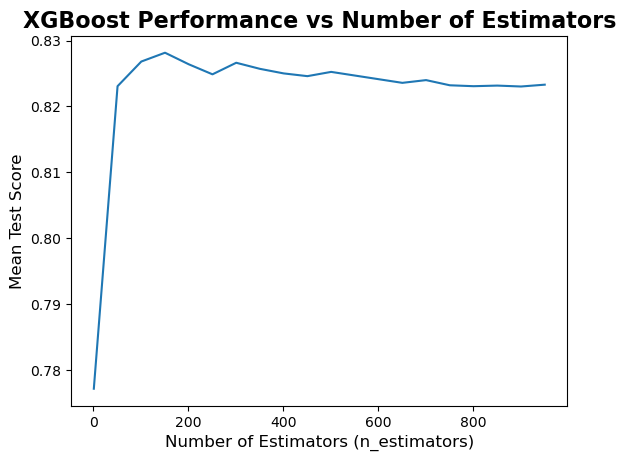

In [ ]:
# Output parameter terbaik dan skor terbaik
print(f"Best Parameters: {xgb_tuned.best_params_}")
print(f"Best Cross-Validation Score: {xgb_tuned.best_score_:.4f}")
# Data plotting
x = xgb_tuned.cv_results_['param_n_estimators']
y = xgb_tuned.cv_results_['mean_test_score']
plt.plot(x, y)
plt.title('XGBoost Performance vs Number of Estimators', fontsize=16, fontweight='bold')
plt.xlabel('Number of Estimators (n_estimators)', fontsize=12)
plt.ylabel('Mean Test Score', fontsize=12)
plt.show()

## Comparison After Tuning

In [ ]:
xgb_test_accuracy = xgb_tuned.score(X_test_scaled, y_test)
xgb_train_accuracy = xgb_tuned.score(X_train_scaled, y_train_resampled)
xgb_cross_val_accuracy = xgb_tuned.best_score_

rf_test_accuracy = rf_tuned.score(X_test_scaled, y_test)
rf_train_accuracy = rf_tuned.score(X_train_scaled, y_train_resampled)
rf_cross_val_accuracy = rf_tuned.best_score_

knn_test_accuracy = knn_tuned.score(X_test_scaled, y_test)
knn_train_accuracy = knn_tuned.score(X_train_scaled, y_train_resampled)
knn_cross_val_accuracy = knn_tuned.best_score_

# Membuat DataFrame untuk membandingkan hasil
comparison_df_tuned = pd.DataFrame({
    "Model": ["XGBoost", "Random Forest", "KNN"],
    "Train Accuracy": [xgb_train_accuracy, rf_train_accuracy, knn_train_accuracy],
    "Cross-validation Accuracy": [xgb_cross_val_accuracy, rf_cross_val_accuracy, knn_cross_val_accuracy],
    "Test Accuracy": [xgb_test_accuracy, rf_test_accuracy, knn_test_accuracy]
})

# Menampilkan DataFrame



In [ ]:
comparison_df_tuned

,Model,Train Accuracy,Cross-validation Accuracy,Test Accuracy
0,XGBoost,0.916405,0.828151,0.788670
1,Random Forest,0.998984,0.841214,0.766731
2,KNN,0.897526,0.804056,0.727853


## Faktor yang Perlu Dipertimbangkan:

### 1. Overfitting (Train vs. Test):

- **KNN** menunjukkan penurunan signifikan antara **train** dan **test** (dari 0.89 menjadi 0.72), yang menandakan kemungkinan **overfitting**. Ini berarti model terlalu baik pada data pelatihan tetapi gagal generalisasi dengan baik pada data yang tidak terlihat (test set).
  
- **Random Forest** menunjukkan **train score** yang sangat tinggi (0.99), yang mengindikasikan kemungkinan **overfitting**, meskipun nilai **cross-validation** dan **test**-nya masih relatif baik.

- **XGBoost** memiliki performa **train** yang lebih seimbang (0.91) dibandingkan dengan **Random Forest**, dan nilai **cross-validation** serta **test** relatif baik (0.82 dan 0.78). Ini menunjukkan bahwa **XGBoost** adalah model yang lebih **generalis** dibandingkan dengan **KNN** dan **Random Forest**.

---

### 2. Stabilitas (Cross-validation vs. Test):

- **XGBoost** memiliki performa yang stabil di **cross-validation** (0.82) dan **test** (0.78), yang menandakan bahwa model ini cenderung lebih konsisten dan mampu menghindari overfitting dengan baik.

- **Random Forest** juga cukup stabil antara **cross-validation** (0.84) dan **test** (0.76), meskipun **train score** yang tinggi menunjukkan kemungkinan overfitting.

- **KNN** menunjukkan perbedaan besar antara **train score** dan **test score**, yang mengindikasikan bahwa model ini mungkin terlalu kompleks atau tidak cukup kuat untuk generalisasi.

---

### 3. Generalizability (Test Set Performance):

- **XGBoost** memberikan **test score** tertinggi (0.78), yang menunjukkan kemampuan terbaik untuk **generalisasi** di luar data pelatihan dan cross-validation.

- **Random Forest** juga memiliki **test score** yang baik (0.76), namun masih sedikit di bawah **XGBoost**.

- **KNN** memiliki **test score** yang lebih rendah (0.72), yang mengindikasikan performa yang lebih buruk pada data yang tidak terlihat.

---

## Rekomendasi Model Terbaik:

Berdasarkan hasil di atas, **XGBoost** terlihat sebagai model yang paling **terbaik** untuk tugas ini karena memiliki:

- **Performa yang konsisten** antara **train**, **cross-validation**, dan **test**.
- **Test score** yang tertinggi (0.78), menunjukkan kemampuan terbaik dalam **generalizability**.
- **Overfitting yang lebih rendah** dibandingkan dengan **Random Forest**, yang menunjukkan model ini tidak terlalu menyesuaikan diri dengan data pelatihan secara berlebihan.

---

## Kesimpulan:

**XGBoost** adalah model yang terbaik untuk sekarang, karena memiliki keseimbangan antara performa pelatihan dan kemampuan untuk generalisasi ke data baru.


### Feature Importance

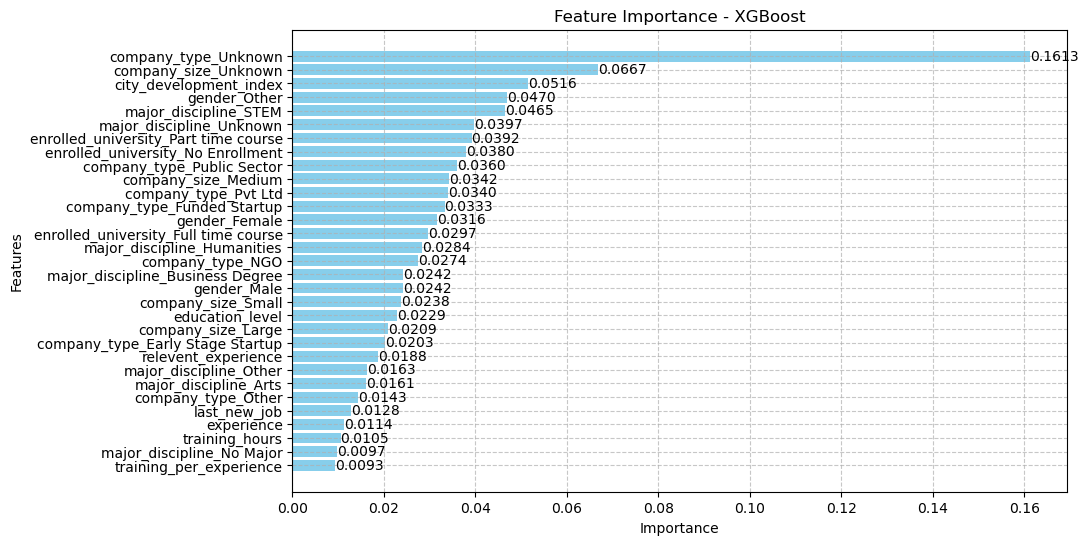

In [ ]:
# Mendapatkan feature importance dari model XGBoost
best_xgb_model = xgb_tuned.best_estimator_
feature_importance_xgb = best_xgb_model.feature_importances_

# Membuat DataFrame untuk menampilkan fitur dan importance
feature_names = X_train.columns  # Nama fitur dari X_train
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance_xgb
})

# Mengurutkan berdasarkan nilai importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualisasi Feature Importance dengan Grid
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # Membalik agar fitur yang paling penting ada di atas

# Menambahkan grid untuk membuat plot lebih jelas
plt.grid(True, linestyle='--', alpha=0.7)

# Menambahkan angka di sebelah kanan batang
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.4f}', va='center', ha='left', color='black')

plt.show()

### Analisis Feature Importance untuk Prediksi Attrisi Karyawan - XGBoost

Berdasarkan grafik **Feature Importance** untuk model **XGBoost**, berikut adalah analisis mengenai kontribusi masing-masing fitur terhadap prediksi **attrisi karyawan** (kemungkinan seorang karyawan untuk meninggalkan perusahaan):

1. **Fitur dengan Kontribusi Terbesar:**
   - **`company_type_Unknown`**: Fitur ini memiliki nilai **importance** tertinggi (**0.1613**), yang menunjukkan bahwa jenis perusahaan yang tidak diketahui memainkan peran besar dalam prediksi attrisi karyawan. Ini bisa berarti bahwa ketidakjelasan atau perubahan dalam status perusahaan dapat memengaruhi keputusan karyawan untuk tetap atau meninggalkan perusahaan.
   - **`company_size_Unknown`**: Ini juga menjadi fitur yang penting dengan **importance** **0.0667**. Ketidakjelasan dalam ukuran perusahaan dapat menciptakan ketidakpastian bagi karyawan, yang berpotensi berhubungan dengan attrisi.
   - **`city_development_index`**: Fitur ini dengan nilai **importance** **0.0516** mungkin mengindikasikan bahwa tingkat pengembangan kota tempat perusahaan berada memengaruhi keputusan karyawan dalam memilih untuk bertahan atau meninggalkan pekerjaan mereka. Karyawan mungkin lebih cenderung untuk meninggalkan perusahaan jika kota tersebut tidak berkembang atau memberikan peluang yang baik.

2. **Fitur Terkait Karyawan yang Penting:**
   - **`major_discipline_STEM`** dan **`major_discipline_Unknown`**: Fitur yang mengidentifikasi latar belakang pendidikan karyawan, seperti **`STEM`**, menunjukkan pengaruh terhadap keputusan mereka. Fitur **`major_discipline_Unknown`** dengan **importance** **0.0397** juga memberikan kontribusi signifikan, mungkin mencerminkan kurangnya kejelasan dalam disiplin karyawan yang relevan dengan posisi mereka.
   - **`gender_Other`**: Meskipun tidak terlalu tinggi (**importance** 0.0470), fitur ini dapat mencerminkan pengaruh identitas gender terhadap kemungkinan attrisi, yang semakin diakui dalam berbagai studi mengenai keberagaman dan inklusi di tempat kerja.

3. **Fitur dengan Kontribusi Kecil:**
   - **`training_per_experience`** dan **`training_hours`**: Fitur-fitur ini memiliki kontribusi yang lebih kecil dengan nilai **importance** sekitar **0.0093** dan **0.0105**, yang menunjukkan bahwa pelatihan atau pengalaman tidak terlalu menentukan dalam prediksi attrisi karyawan dalam model ini. Meskipun pelatihan dan pengalaman penting, mereka mungkin tidak berhubungan langsung dengan keputusan untuk meninggalkan pekerjaan.
   - **`last_new_job_experience`**: Fitur ini juga memiliki kontribusi rendah dengan **importance** **0.0114**. Meskipun pengalaman di pekerjaan sebelumnya dapat memengaruhi keputusan, model ini menunjukkan bahwa faktor lain lebih dominan dalam memprediksi attrisi.

### Kesimpulan:
- **Faktor Utama dalam Prediksi Attrisi**: Faktor-faktor yang berhubungan dengan **jenis perusahaan**, **ukuran perusahaan**, dan **pengembangan kota** sangat berpengaruh dalam memprediksi attrisi karyawan. Ketidakjelasan atau ketidakpastian dalam perusahaan dan lokasi dapat menjadi indikasi kuat bagi karyawan untuk meninggalkan pekerjaan mereka.
- **Faktor Lain yang Perlu Diperhatikan**: Meskipun pelatihan dan pengalaman (seperti **training_hours** dan **training_per_experience**) memiliki kontribusi rendah, keduanya masih tetap penting untuk pengembangan karyawan dan harus dipertimbangkan dalam strategi HR.
- **Fitur yang Dapat Dieksplorasi Lebih Lanjut**: Fitur terkait **gender** dan **latar belakang pendidikan** menunjukkan adanya pengaruh terhadap keputusan karyawan, dan dapat membuka peluang untuk analisis lebih lanjut mengenai keberagaman dan inklusi di perusahaan.

Berdasarkan analisis ini, perusahaan dapat mempertimbangkan faktor-faktor tersebut untuk mengurangi tingkat attrisi, misalnya dengan memberikan lebih banyak kejelasan terkait jenis dan ukuran perusahaan serta kondisi ekonomi atau pengembangan kota tempat perusahaan beroperasi.
